In [9]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup


In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

# Use this guide to select your web browser of choice

Chrome_service = ChromeService(ChromeDriverManager().install())

driver = webdriver.Chrome(service=Chrome_service)
driver.implicitly_wait(5)

URL = "https://zh.hotels.com/Hotel-Search?adults=2&d1=2023-09-29&d2=2023-09-30&destination=London%2C%20England%2C%20United%20Kingdom&endDate=2023-12-06&latLong=51.50746%2C-0.127673&locale=en_HK&pos=HCOM_HK&regionId=2114&rooms=1&semdtl=&siteid=300000039&sort=RECOMMENDED&startDate=2023-12-05&theme=&useRewards=false&userIntent="


driver.get(URL)
time.sleep(10)

print(driver)


<selenium.webdriver.chrome.webdriver.WebDriver (session="565a2baa7a3a710258a4beacad02aaa9")>


In [24]:
response=requests.get(URL)
response

<Response [200]>

<html data-language="en_HK" dir="ltr" lang="en">
 <head>
  <title>
   London, England, United Kingdom Hotel Search results
  </title>
  <meta content="noindex,nofollow" name="robots"/>
  <link href="https://maps.googleapis.com/" rel="preconnect"/>
  <link as="script" href="https://c.travel-assets.com/shopping-pwa/l10nBundle/en_HK.5beb0cc450528781bdb7.js" rel="preload"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="#000000" name="theme-color"/>
  <link href="/favicon.ico" rel="shortcut icon" sizes="16x16 32x32" type="image/x-icon"/>
  <link href="/favicon.ico" rel="icon" sizes="16x16 32x32" type="image/x-icon"/>
  <link href="/favicon.ico" rel="apple-touch-icon"/>
  <style>
   .pwa-theme--primary{color:#e61e43}.pwa-theme--secondary{color:#
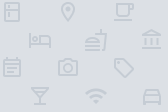
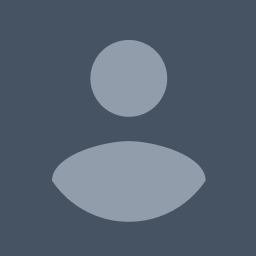

In [54]:
subhtml = driver.page_source
soup= BeautifulSoup(subhtml, 'html.parser')
print(soup.prettify())

In [55]:
prices = soup.find_all('div', class_="uitk-text uitk-type-500 uitk-type-medium uitk-text-emphasis-theme")
prices_l = []
for price in prices:
    prices_l.append(price.text)
prices_l = [float(price.replace('HK$','').replace(',','')) for price in prices_l]
print(prices_l)


[4337.0, 2503.0, 1057.0, 1986.0, 1968.0, 2887.0, 3960.0, 1464.0, 2018.0, 3099.0, 2493.0, 2369.0, 1875.0, 3654.0, 1960.0, 2149.0, 1542.0]


In [56]:
hotels = soup.find_all('h3', class_="uitk-heading uitk-heading-5 overflow-wrap uitk-layout-grid-item uitk-layout-grid-item-has-row-start")
hotels_l = []
for hotel in hotels:
    hotels_l.append(hotel.text)
print(hotels_l)


['London Marriott Hotel County Hall', 'H10 London Waterloo', 'The Duke Rooms London', 'Zedwell Piccadilly Circus', 'City Sleeper at Royal National Hotel', 'Sloane Place', 'Holmes Hotel London', 'Central Park Hotel', 'Ember Locke', 'AMANO Covent Garden', 'Strand Palace Hotel', "The Bailey's Hotel London Kensington", 'Waterloo Hub Hotel & Suites', "L'oscar London", 'St Giles Hotel - London', 'The Resident Kensington', 'Studios2Let Bloomsbury']


In [57]:
reviews = soup.find_all('div', class_="uitk-text truncate-lines-2 uitk-type-200 uitk-type-regular uitk-text-default-theme")
reviews_l = []
for review in reviews:
    reviews_l.append(review.find('span', class_='is-visually-hidden').text)

reviews_l = [int(review.replace(',', '').split()[0]) for review in reviews_l]
print(reviews_l)

[1002, 1001, 382, 2749, 738, 478, 450, 1003, 82, 548, 2634, 1276, 1000, 198, 2345, 1000, 1062]


In [58]:
ratings = soup.find_all('span', class_="uitk-badge-base-text")
ratings_l = []
for rating in ratings:
    try:
        ratings_l.append(float(rating.text))
    except ValueError:
        ratings_l.append(float(0))
print(ratings_l)

[0.0, 8.8, 8.6, 8.0, 7.6, 8.4, 9.2, 9.2, 7.0, 9.2, 8.4, 8.6, 8.8, 7.8, 9.6, 7.4, 9.4, 8.0]


In [59]:
comments = soup.find_all('div', class_="uitk-text truncate-lines-2 uitk-type-300 uitk-type-medium uitk-text-emphasis-theme")
comments_l = []
for comment in comments:
    comments_l.append(comment.find('span', class_='is-visually-hidden').text)
print(comments_l)

['excellent', 'excellent', 'very good', 'good', 'very good', 'wonderful', 'wonderful', 'good', 'wonderful', 'very good', 'excellent', 'excellent', 'good', 'exceptional', 'good', 'exceptional', 'very good']


In [73]:
table_data = {
    'Hotel': hotels_l,
    'Price': prices_l,
    'Comment': comments_l,
    
    'Review': reviews_l

}

hotel_df = pd.DataFrame(table_data)
hotel_df

,Hotel,Price,Comment,Review
0,London Marriott Hotel County Hall,4337.0,excellent,1002
1,H10 London Waterloo,2503.0,excellent,1001
2,The Duke Rooms London,1057.0,very good,382
3,Zedwell Piccadilly Circus,1986.0,good,2749
4,City Sleeper at Royal National Hotel,1968.0,very good,738
5,Sloane Place,2887.0,wonderful,478
6,Holmes Hotel London,3960.0,wonderful,450
7,Central Park Hotel,1464.0,good,1003
8,Ember Locke,2018.0,wonderful,82
9,AMANO Covent Garden,3099.0,very good,548


In [75]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hotel    17 non-null     object 
 1   Price    17 non-null     float64
 2   Comment  17 non-null     object 
 3   Review   17 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 672.0+ bytes


In [76]:
hotel_df.describe()

,Price,Review
count,17.000000,17.000000
mean,2430.647059,1055.764706
std,899.311747,801.597431
min,1057.000000,82.000000
25%,1960.000000,478.000000
50%,2149.000000,1000.000000
75%,2887.000000,1062.000000
max,4337.000000,2749.000000


In [77]:
hotel_df.isnull().sum()

Hotel      0
Price      0
Comment    0
Review     0
dtype: int64

/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


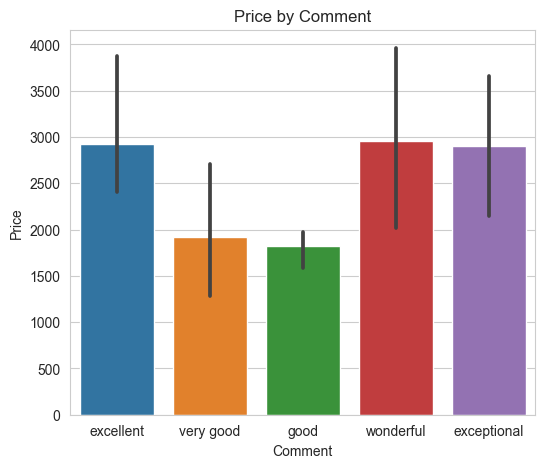

In [78]:
sns.set_style('whitegrid')

plt.figure(figsize=(6,5))
sns.barplot(x='Comment', y='Price', data=hotel_df)
plt.title('Price by Comment')
plt.xlabel('Comment')
plt.ylabel('Price')
plt.show()

/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


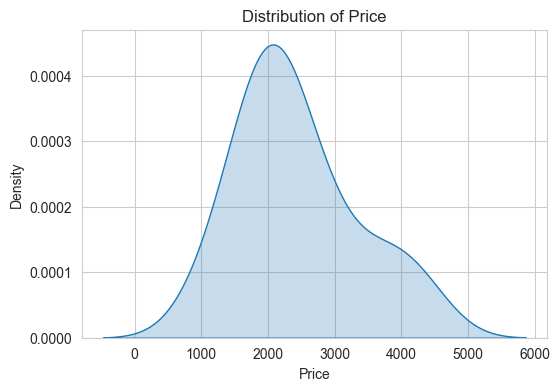

In [79]:
plt.figure(figsize=(6,4))
sns.kdeplot(hotel_df['Price'], fill=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()